In [1]:
!pip install numpy

In [2]:
!pip install pandas

In [3]:
!pip install sklearn

Importing libs and Loading data
----

In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import json

In [5]:
movies_df=pd.read_csv(r'D:\ENGINEERING\recommendation system\tmdb_5000_movies.csv')
credits_df=pd.read_csv(r'D:\ENGINEERING\recommendation system\tmdb_5000_credits.csv')

In [6]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
!pip install missingno

Observing NANs
-----

In [9]:
import missingno

<AxesSubplot:>

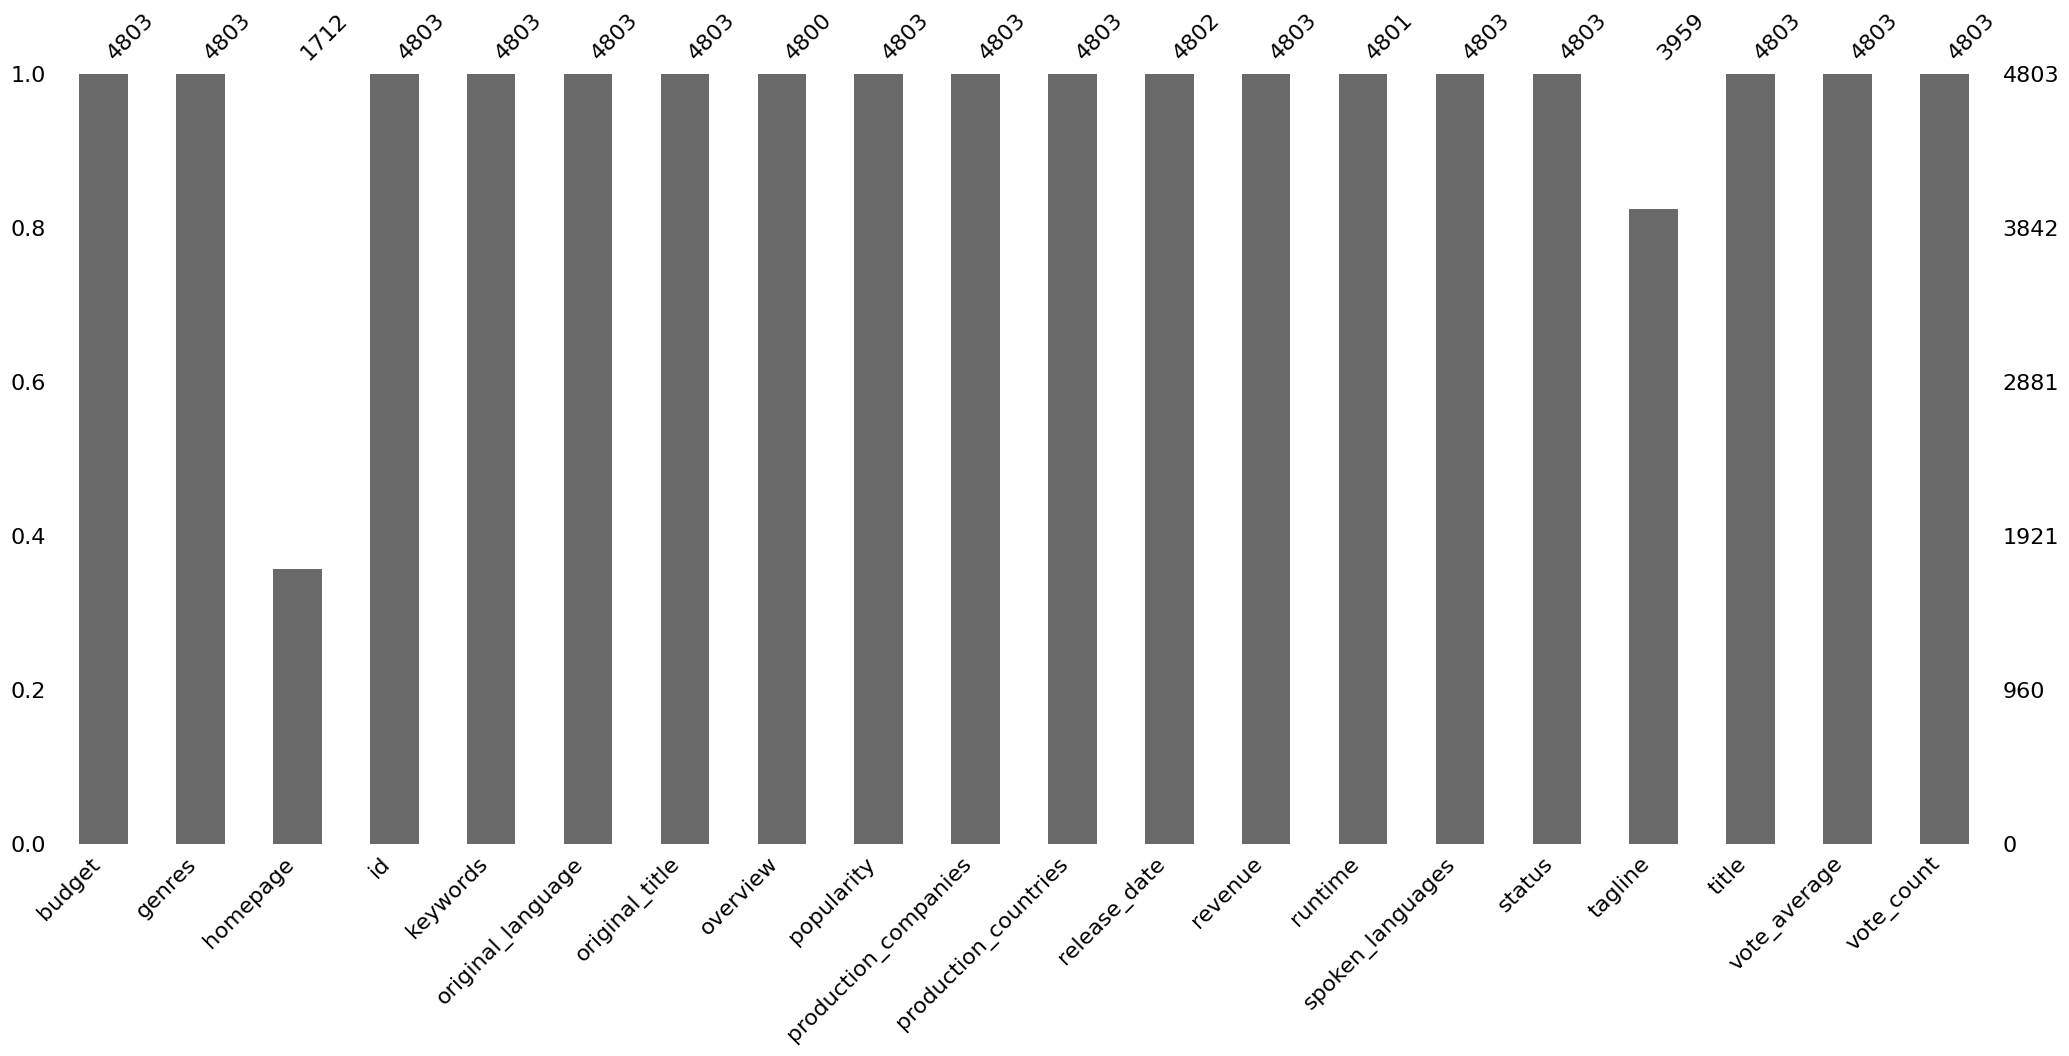

In [10]:
missingno.bar(movies_df)

<AxesSubplot:>

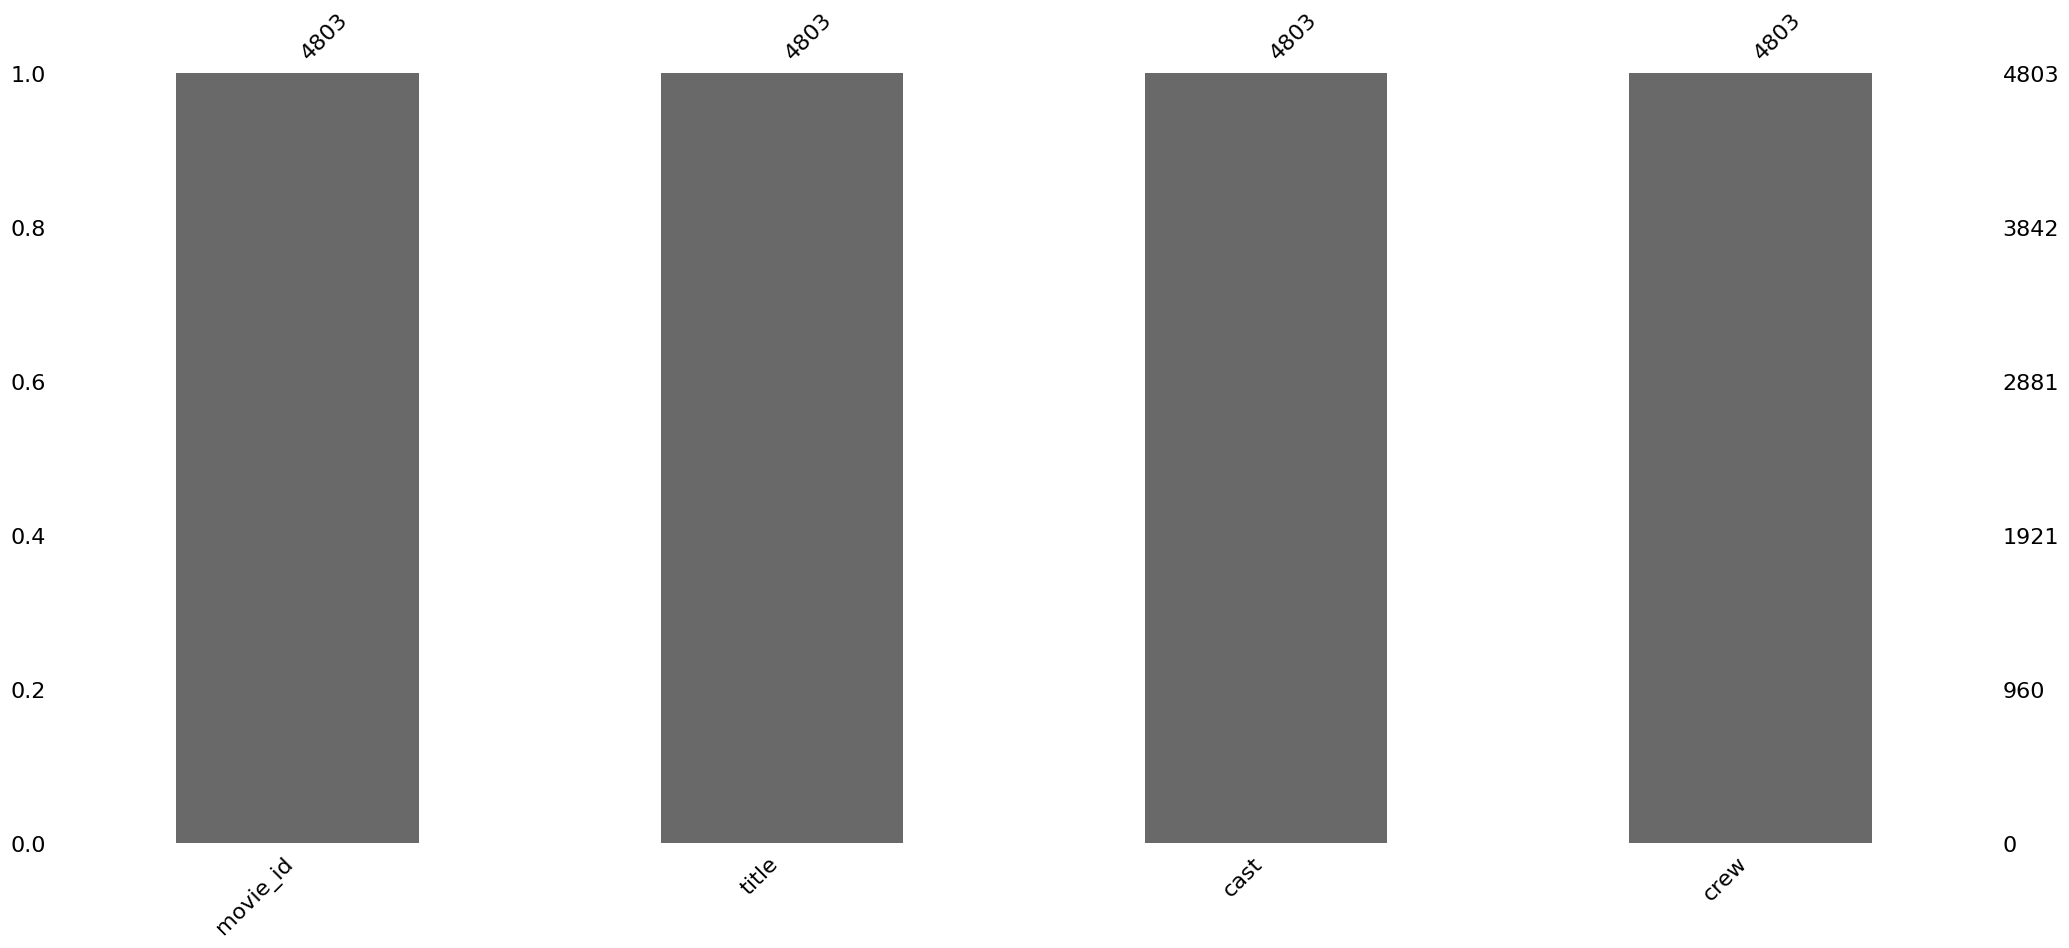

In [11]:
missingno.bar(credits_df)

Combining data frames and Choosing Important Cols
------------

In [12]:
credits_df.rename(columns={'movie_id': 'id'},inplace=True)

In [13]:
movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [14]:
movies_data=movies_df[['id','genres','keywords','production_companies']]

In [15]:
movies_data=movies_data.merge(credits_df, on="id")

In [16]:
movies_data.head(2)

,id,genres,keywords,production_companies,title,cast,crew
0,19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [17]:
movies_data.drop(columns='id',inplace=True)

In [18]:
movies_data.head(2)

,genres,keywords,production_companies,title,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


Handeling the JSON string
-----

In [19]:
cols=movies_data.columns
cols

Index(['genres', 'keywords', 'production_companies', 'title', 'cast', 'crew'], dtype='object')

In [20]:
# import json
# from json import loads ,load,dumps
from ast import literal_eval

In [21]:
for col in cols :
    movies_data[col]=movies_data[col].apply(literal_eval)
    
#     movies_data[col]=movies_data[col].apply(json.dumps)
#     movies_data[col]=movies_data[col].apply(json.loads)


ValueError: malformed node or string on line 1: <ast.Name object at 0x000001F87CA21A50>

In [22]:
movies_data['crew']=movies_data['crew'].apply(literal_eval)

In [23]:
movies_data['cast']=movies_data['cast'].apply(literal_eval)

In [ ]:

#movies_data['crew']=movies_data['crew'].apply(dumps)

In [ ]:
#movies_data['crew']


In [ ]:
#movies_data['crew']=movies_data['crew'].apply(loads)

In [ ]:
#movies_data['crew']

In [ ]:
movies_data.head()

In [ ]:
type(movies_data['crew'])

In [24]:
def director(x):
    for i in x :
        if i['job']== "Director" :
            return i["name"]
    return np.nan

In [25]:
movies_data['director']=movies_data['crew'].apply(director)

In [26]:
def prod_com(x):
    for i in x :
        return i["name"]
    

In [27]:
movies_data['production_companies']=movies_data['production_companies'].apply(prod_com)

In [ ]:
movies_data.head()

In [28]:
def get_info(x):
    items=3
    listt=[]
    while items >0:
        listt=[i["name"] for i in x]
        items=items-1
    return listt

In [ ]:
# def get_list(x):
#     if isinstance(x, list):
#         names = [i["name"] for i in x]
#         if len(names) > 3:
#             names = names[:3]
#         return names
#     return []

In [29]:
cols=['genres','keywords','cast']
for col in cols:
    movies_data[col]=movies_data[col].apply(get_info)

In [ ]:
#movies_data['cast']=movies_data['cast'].apply(get_info)

In [30]:
movies_data.drop(columns='crew',inplace=True)

Final Data shape 
-----

In [ ]:
movies_data

Saving df 
---

In [ ]:
movies_data.to_csv(r'D:\ENGINEERING\recommendation system\movies_data.csv', index=False)

Clean data
------

In [31]:
movies_data.dropna()

,genres,keywords,production_companies,title,cast,director
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",Ingenious Film Partners,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron
1,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Walt Disney Pictures,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski
2,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",Columbia Pictures,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes
3,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Legendary Pictures,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...",Christopher Nolan
4,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",Walt Disney Pictures,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",Andrew Stanton
...,...,...,...,...,...,...
4795,[Drama],"[gang, audition, police fake, homeless, actress]",Asylum Films,Bang,"[Darling Narita, Peter Greene, Michael Newland...",Ash Baron-Cohen
4796,"[Science Fiction, Drama, Thriller]","[distrust, garage, identity crisis, time trave...",Thinkfilm,Primer,"[Shane Carruth, David Sullivan, Casey Gooden, ...",Shane Carruth
4798,"[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms, pap...",Columbia Pictures,El Mariachi,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",Robert Rodriguez
4800,"[Comedy, Drama, Romance, TV Movie]","[date, love at first sight, narration, investi...",Front Street Pictures,"Signed, Sealed, Delivered","[Eric Mabius, Kristin Booth, Crystal Lowe, Geo...",Scott Smith


In [32]:
# dropping rows with empty lists 
movies_data=movies_data[movies_data['genres'].map(lambda d: len(d)) > 0] 
movies_data=movies_data[movies_data['keywords'].map(lambda d: len(d)) > 0] 

In [ ]:
movies_data

In [33]:
def clean (x):
    if isinstance(x,list):
        return [str.lower(i.replace(" ","")) for i in x]
    elif isinstance(x,str):
        return str.lower(x.replace(" ",""))
    else: 
        return ""


In [34]:
cols=list(movies_data.columns)
cols.remove('title')
for col in cols : 
    movies_data[col]=movies_data[col].apply(clean)

In [ ]:
movies_data

Prepare Doc
----

In [35]:
def create_doc(df):
    return ' '.join(df.genres)+' '+' '.join(df.keywords)+' '+' '.join(df.production_companies)
    +' '+' '.join(df.cast)+' '+' '.join(df.director)


In [36]:
movies_data['document']=movies_data.apply(create_doc,axis=1)

In [51]:
movies_data.document.head()

0    action adventure fantasy sciencefiction cultur...
1    adventure fantasy action ocean drugabuse exoti...
2    action adventure crime spy basedonnovel secret...
3    action crime drama thriller dccomics crimefigh...
4    action adventure sciencefiction basedonnovel m...
Name: document, dtype: object

Saving Data 
==

In [50]:
movies_data.to_csv(r'D:\ENGINEERING\recommendation system\movies__final_data.csv', index=False)

Cosine Similarity 
----

In [ ]:
movies_data.head(1)

In [37]:
vectorizer=CountVectorizer(stop_words='english')
count_matrix=vectorizer.fit_transform(movies_data['document'])

In [ ]:
count_matrix.shape

In [38]:
cos_sim=cosine_similarity(count_matrix,count_matrix)
cos_sim.shape

(4389, 4389)

In [39]:
movies_data=movies_data.reset_index()

In [40]:
indexs=pd.Series(movies_data.index,movies_data['title'])

In [ ]:
indexs.head(3)

Getting the recommendation 
----

In [45]:
def get_recommendation (title,cos_sim=cos_sim):
    idx=indexs[title]
    similarity_scores=list(enumerate(cos_sim[idx]))
    similarity_scores=sorted(similarity_scores,key=lambda x: x[1],reverse=True) #key with 
    #lambda function sorts according to the score itself as second element in each iteration in list
    similarity_scores=similarity_scores[1:11] #10 movies
    
    movies_idx=[ind[0] for ind in similarity_scores]
    movies=movies_data['title'].iloc[movies_idx]
#     movies=movies_data['movies'].values.tolist()
    
    return movies
    

In [46]:
#movies=get_recommendation("Spider-Man",cos_sim)

In [ ]:
movies.head()

In [52]:
try:
    print(get_recommendation("Die Hard",cos_sim))
except Exception as e:
    print("Please type the movie name right (as it is in imdb) and make sure it is before 2016")

259           Live Free or Die Hard
568                      Die Hard 2
352      Die Hard: With a Vengeance
75      G.I. Joe: The Rise of Cobra
437                        Face/Off
3950                    Killing Zoe
1474                         Takers
2150                       Triple 9
2180          The Cold Light of Day
3105       Showdown in Little Tokyo
Name: title, dtype: object
